<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#1.-형태소-분석" data-toc-modified-id="1.-형태소-분석-1">1. 형태소 분석</a></span></li><li><span><a href="#2.-감성분석-모델-만들기" data-toc-modified-id="2.-감성분석-모델-만들기-2">2. 감성분석 모델 만들기</a></span></li></ul></div>

In [2]:
import scipy as sp
import pandas as pd
import numpy as np

from konlpy.tag import Kkma        ; kkma = Kkma()
from konlpy.tag import Hannanum    ; hannanum = Hannanum()
from konlpy.tag import Okt         ; t = Okt()     # 구 트위터
from konlpy.tag import *
import pickle

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer 
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

%matplotlib inline
import os
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from sklearn.tree import export_graphviz

import matplotlib.font_manager as fm
plt.rc('font', family='NanumGothic')

import matplotlib as mpl
mpl.rcParams['axes.unicode_minus'] = False

import warnings
warnings.filterwarnings('ignore')

In [3]:
# 팍스넷 + 네이버 뉴스데이터 연결하기

news_df = pd.read_csv('팍스넷&네이버_뉴스타이틀.csv')
print(news_df.shape)
news_df

(4800, 3)


,Unnamed: 0,뉴스제목,주가변동
0,0,52주 신고가 종목,0
1,1,증시요약(9) - 기술적 분석 특징주 A(코스닥),0
2,2,증시요약(10) - 기술적 분석 특징주 B(코스닥),0
3,3,오후장 기술적 분석 특징주 A(코스닥),0
4,4,오후장 기술적 분석 특징주 B(코스닥),0
...,...,...,...
4795,2235,신용비율 상위 종목,1
4796,2236,뉴욕증시 마감시황,1
4797,2237,코스피 하락률 상위 50종목,1
4798,2238,미국 주요 ETF 등락률,1


In [4]:
title_list = news_df.뉴스제목.values.tolist()

In [5]:
print(len(title_list))
title_list

4800


['52주 신고가 종목',
 '증시요약(9) - 기술적 분석 특징주 A(코스닥)',
 '증시요약(10) - 기술적 분석 특징주 B(코스닥)',
 '오후장 기술적 분석 특징주 A(코스닥)',
 '오후장 기술적 분석 특징주 B(코스닥)',
 '증시요약(8) - 기술적 분석 특징주 B(코스피)',
 '오전장 기술적 분석 특징주 A(코스닥)',
 '증시요약(7) - 기술적 분석 특징주 A(코스피)',
 '오전장 기술적 분석 특징주 B(코스닥)',
 '오전장 기술적 분석 특징주 A(코스닥)',
 '오후장 기술적 분석 특징주 B(코스피)',
 '외국인/기관 연속 순매수일 상위 20종목(코스닥)',
 '오전장 기술적 분석 특징주 B(코스피)',
 '전일자 증권사 투자의견(유지/신규)',
 '오전장 기술적 분석 특징주 B(코스닥)',
 '외국인/기관 연속 순매도일 상위 20종목(코스닥)',
 '오후장 기술적 분석 특징주 A(코스피)',
 '코스피 하락률 상위 50종목',
 '외국계 순매수,도 상위종목(코스닥) 수량기준',
 '코스닥 하락률 상위 50종목',
 '코스닥 하락률 상위 50종목',
 '코스닥 상승률 상위 50종목',
 '코스닥 하락률 상위 50종목',
 '코스피 하락률 상위 50종목',
 '오전장 기술적 분석 특징주 B(코스피)',
 '코스닥 상승률 상위 50종목',
 '증시요약(6) - 특징 상한가 및 급등종목',
 '외국계 순매수,도 상위종목(코스닥) 수량기준',
 '코스닥 하락률 상위 50종목',
 '외국인/기관 연속 순매수일 상위 20종목(코스피)',
 '코스피 상승률 상위 50종목',
 '오전장 기술적 분석 특징주 A(코스피)',
 '외국인/기관 연속 순매도일 상위 20종목(코스피)',
 '코스닥 외국인 순매수,도 상위20종목',
 '외국계 순매수,도 상위종목(코스닥) 금액기준',
 '신용비율 상위 종목',
 '오전장 기술적 분석 특징주 A(코스피)',
 '코스피 하락률 상위 50종목',
 '코스닥 기관 순매수,도 상위20종목',
 '코스피 상승률 상위 

In [6]:
title_text = ''

for each_line in title_list:
    title_text = title_text + each_line + '\n'
    
title_text

'52주 신고가 종목\n증시요약(9) - 기술적 분석 특징주 A(코스닥)\n증시요약(10) - 기술적 분석 특징주 B(코스닥)\n오후장 기술적 분석 특징주 A(코스닥)\n오후장 기술적 분석 특징주 B(코스닥)\n증시요약(8) - 기술적 분석 특징주 B(코스피)\n오전장 기술적 분석 특징주 A(코스닥)\n증시요약(7) - 기술적 분석 특징주 A(코스피)\n오전장 기술적 분석 특징주 B(코스닥)\n오전장 기술적 분석 특징주 A(코스닥)\n오후장 기술적 분석 특징주 B(코스피)\n외국인/기관 연속 순매수일 상위 20종목(코스닥)\n오전장 기술적 분석 특징주 B(코스피)\n전일자 증권사 투자의견(유지/신규)\n오전장 기술적 분석 특징주 B(코스닥)\n외국인/기관 연속 순매도일 상위 20종목(코스닥)\n오후장 기술적 분석 특징주 A(코스피)\n코스피 하락률 상위 50종목\n외국계 순매수,도 상위종목(코스닥) 수량기준\n코스닥 하락률 상위 50종목\n코스닥 하락률 상위 50종목\n코스닥 상승률 상위 50종목\n코스닥 하락률 상위 50종목\n코스피 하락률 상위 50종목\n오전장 기술적 분석 특징주 B(코스피)\n코스닥 상승률 상위 50종목\n증시요약(6) - 특징 상한가 및 급등종목\n외국계 순매수,도 상위종목(코스닥) 수량기준\n코스닥 하락률 상위 50종목\n외국인/기관 연속 순매수일 상위 20종목(코스피)\n코스피 상승률 상위 50종목\n오전장 기술적 분석 특징주 A(코스피)\n외국인/기관 연속 순매도일 상위 20종목(코스피)\n코스닥 외국인 순매수,도 상위20종목\n외국계 순매수,도 상위종목(코스닥) 금액기준\n신용비율 상위 종목\n오전장 기술적 분석 특징주 A(코스피)\n코스피 하락률 상위 50종목\n코스닥 기관 순매수,도 상위20종목\n코스피 상승률 상위 50종목\n52주 신고가 종목\n증시요약(9) - 기술적 분석 특징주 A(코스닥)\n증시요약(7) - 기술적 분석 특징주 A(코스피)\n증시요약(10) - 기술적 분석 특징주 B(코스닥)\n증시요약(8) - 기술

# 1. 형태소 분석

In [7]:
tokens_ko = t.morphs(title_text)

In [8]:
tokens_ko

['52',
 '주',
 '신고',
 '가',
 '종목',
 '\n',
 '증시',
 '요약',
 '(',
 '9',
 ')',
 '-',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'A',
 '(',
 '코스닥',
 ')',
 '\n',
 '증시',
 '요약',
 '(',
 '10',
 ')',
 '-',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'B',
 '(',
 '코스닥',
 ')',
 '\n',
 '오후',
 '장',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'A',
 '(',
 '코스닥',
 ')',
 '\n',
 '오후',
 '장',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'B',
 '(',
 '코스닥',
 ')',
 '\n',
 '증시',
 '요약',
 '(',
 '8',
 ')',
 '-',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'B',
 '(',
 '코스피',
 ')',
 '\n',
 '오전',
 '장',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'A',
 '(',
 '코스닥',
 ')',
 '\n',
 '증시',
 '요약',
 '(',
 '7',
 ')',
 '-',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'A',
 '(',
 '코스피',
 ')',
 '\n',
 '오전',
 '장',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'B',
 '(',
 '코스닥',
 ')',
 '\n',
 '오전',
 '장',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'A',
 '(',
 '코스닥',
 ')',
 '\n',
 '오후',
 '장',
 '기술',
 '적',
 '분석',
 '특징',
 '주',
 'B',
 '(',
 '코스피',
 ')',
 '\n',
 '외국인',
 '/',
 '기관',
 '연속',
 '순',
 '매',
 '수일',
 '상위',
 '20',
 '종목',
 

In [9]:
import nltk
ko = nltk.Text(tokens_ko)
ko

<Text: 52 주 신고 가 종목 
 증시 요약...>

In [10]:
print(len(ko.tokens))          # 토큰 전체 개수
print(len(set(ko.tokens)))     # 토큰 unique 개수

53725
1753


In [11]:
# 빈도수가 높은 단어 출력

ko.vocab().most_common(200)

[('\n', 4800),
 ('(', 3178),
 (')', 3177),
 ('종목', 2554),
 ('코스닥', 2229),
 ('상위', 2033),
 ('주', 1930),
 ('특징', 1900),
 ('기술', 1765),
 ('적', 1763),
 ('분석', 1758),
 ('코스피', 1609),
 ('장', 1457),
 ('50', 1017),
 ('순', 923),
 ('B', 899),
 ('A', 857),
 ('오전', 805),
 ('하락', 724),
 ('률', 703),
 (',', 674),
 ('증시', 643),
 ('20', 622),
 ('-', 593),
 ('요약', 584),
 ('매수', 548),
 ('도', 547),
 ('외국인', 504),
 ('기관', 494),
 ('오후', 472),
 ('/', 462),
 ('매', 375),
 ('연속', 374),
 ('상', 340),
 ('승률', 334),
 ('기준', 331),
 ('주요', 306),
 ('계', 300),
 ('외국', 299),
 ('수량', 252),
 ('후', 209),
 ('가', 200),
 ('도일', 198),
 ('공시', 175),
 ('수일', 173),
 ("'", 163),
 ('…', 158),
 ('[', 151),
 ('마감', 145),
 (']', 144),
 ('9', 121),
 ('10', 121),
 ('8', 121),
 ('7', 120),
 ('뉴스', 111),
 ('신고', 98),
 ('비율', 98),
 ('감', 98),
 ('52', 97),
 ('장마', 97),
 ('신용', 96),
 ('및', 90),
 ('"', 90),
 ('급등', 86),
 ('상한', 84),
 ('투자', 83),
 ('6', 83),
 ('전', 78),
 ('일자', 76),
 ('에', 76),
 ('증권사', 69),
 ('신규', 69),
 ('·', 68),
 ('의견', 65

In [12]:
# 불용어(stopwords) 제거하기

stop_words = ['\n',"'",'…',',','[',']','(',')','"','주','에','코스닥','특징','종목','·','장','코스피','증시','-','적',\
              '도','기술','분석','마감','‘','`','요약','가','’','의','이','오전','★','은','“','대','”','한','B','로',\
              '?','3','선','A','오후','는','5','!','"…','상','들','1','만에','제','2','…"','20','일','서','명',"'…",'기',\
              '···','10','소','등','으로','자','전','률','미','...','50','세','시','안','폭',"…'",'만','9','VI','까지',\
              '눈','더','e','량','고','인','52','성','띄네','1%','부터','다','감','을','지','4','에도','수','7','것','째',\
             '체크','기','···','중','계','관련','왜','1억원','총','내','과','젠','또','연','엔','차','굿모닝','할','8','.',\
             '보다','새','주간','전망','추천','이슈','플러스','사','개월','때','..','임','속','’…','G','나','개','원','에서',\
             '하는','이유','달','→','권','?…','단독','간','배','30','K','저','와','하','/','1조','6','두','해야','분','형',\
             '황','공','&','앞두고','보','문','이번','익','X','1억',']"','치','산','를','오','해','S','우리','그','된','준','▶',\
             '건','재','반','라','10년','초','3분','월','신','p','급','조','줄','경','했다','구','진','이어','올','발','vs','강',\
             '국','9억','1년','난','판','면','"(','`…','살','아','인데','번','텍','팜','8월','Q','메','2년','점','하고','10월',\
             'D','비','됐다','채',"]'",'보니','손','확','종','동','팔','40','타','~','9월','2100','30%','땐','말','한다','요',\
             "',",'스','…`','단','16','길','12','3억','회','될까','호','용','2조','번째','일까','듯','최']

tokens_ko = [each_word for each_word in tokens_ko
           if each_word not in stop_words]

ko = nltk.Text(tokens_ko)
ko.vocab().most_common(100)

[('상위', 2033),
 ('순', 923),
 ('하락', 724),
 ('매수', 548),
 ('외국인', 504),
 ('기관', 494),
 ('매', 375),
 ('연속', 374),
 ('승률', 334),
 ('기준', 331),
 ('주요', 306),
 ('외국', 299),
 ('수량', 252),
 ('후', 209),
 ('도일', 198),
 ('공시', 175),
 ('수일', 173),
 ('뉴스', 111),
 ('신고', 98),
 ('비율', 98),
 ('장마', 97),
 ('신용', 96),
 ('및', 90),
 ('급등', 86),
 ('상한', 84),
 ('투자', 83),
 ('일자', 76),
 ('증권사', 69),
 ('신규', 69),
 ('의견', 65),
 ('유지', 61),
 ('株', 59),
 ('뉴욕증시', 48),
 ('금액', 47),
 ('실적', 46),
 ('재송', 34),
 ('美', 33),
 ('강세', 30),
 ('종가', 29),
 ('동시', 29),
 ('호가', 29),
 ('특이', 29),
 ('테마', 26),
 ('기업', 26),
 ('공매도', 23),
 ('상승', 23),
 ('세계', 19),
 ('나스닥', 19),
 ('금리', 19),
 ('SK', 19),
 ('재개', 18),
 ('오늘', 18),
 ('발표', 18),
 ('일정', 18),
 ('↑', 18),
 ('미국', 18),
 ('스케줄', 17),
 ('다우', 16),
 ('개미', 16),
 ('1분', 15),
 ('변동', 15),
 ('연결', 14),
 ('삼성', 14),
 ('테마주', 13),
 ('최고', 13),
 ('↓', 13),
 ('시장', 13),
 ('일제', 13),
 ('주목', 13),
 ('기대', 13),
 ('+', 13),
 ('주가', 13),
 ('자산', 12),
 ('배당', 12),
 ('직전', 12),
 ('30분'

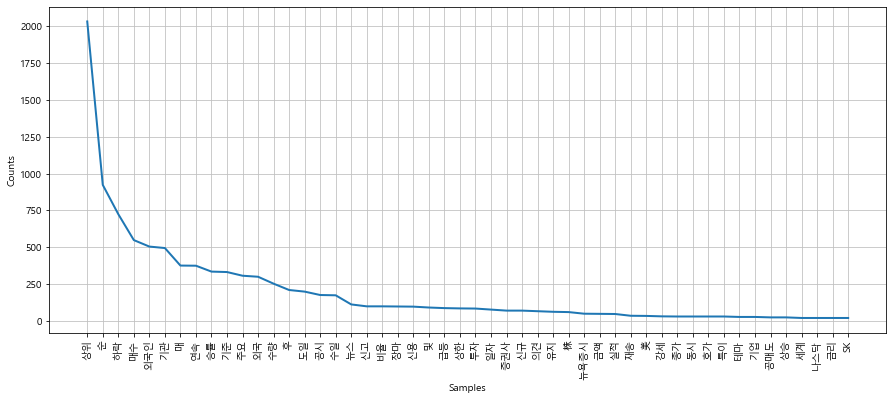

In [13]:
# 그래프에서 한글 폰트 깨지는 문제에 대한 대처(전역 글꼴 설정)

from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname='c:/Windows/Fonts/malgun.ttf').get_name()
rc('font', family=font_name)

import graphviz
plt.figure(figsize=(15,6))
ko.plot(50)
plt.show()

In [14]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

In [15]:
data = ko.vocab().most_common(300)
data

[('상위', 2033),
 ('순', 923),
 ('하락', 724),
 ('매수', 548),
 ('외국인', 504),
 ('기관', 494),
 ('매', 375),
 ('연속', 374),
 ('승률', 334),
 ('기준', 331),
 ('주요', 306),
 ('외국', 299),
 ('수량', 252),
 ('후', 209),
 ('도일', 198),
 ('공시', 175),
 ('수일', 173),
 ('뉴스', 111),
 ('신고', 98),
 ('비율', 98),
 ('장마', 97),
 ('신용', 96),
 ('및', 90),
 ('급등', 86),
 ('상한', 84),
 ('투자', 83),
 ('일자', 76),
 ('증권사', 69),
 ('신규', 69),
 ('의견', 65),
 ('유지', 61),
 ('株', 59),
 ('뉴욕증시', 48),
 ('금액', 47),
 ('실적', 46),
 ('재송', 34),
 ('美', 33),
 ('강세', 30),
 ('종가', 29),
 ('동시', 29),
 ('호가', 29),
 ('특이', 29),
 ('테마', 26),
 ('기업', 26),
 ('공매도', 23),
 ('상승', 23),
 ('세계', 19),
 ('나스닥', 19),
 ('금리', 19),
 ('SK', 19),
 ('재개', 18),
 ('오늘', 18),
 ('발표', 18),
 ('일정', 18),
 ('↑', 18),
 ('미국', 18),
 ('스케줄', 17),
 ('다우', 16),
 ('개미', 16),
 ('1분', 15),
 ('변동', 15),
 ('연결', 14),
 ('삼성', 14),
 ('테마주', 13),
 ('최고', 13),
 ('↓', 13),
 ('시장', 13),
 ('일제', 13),
 ('주목', 13),
 ('기대', 13),
 ('+', 13),
 ('주가', 13),
 ('자산', 12),
 ('배당', 12),
 ('직전', 12),
 ('30분'

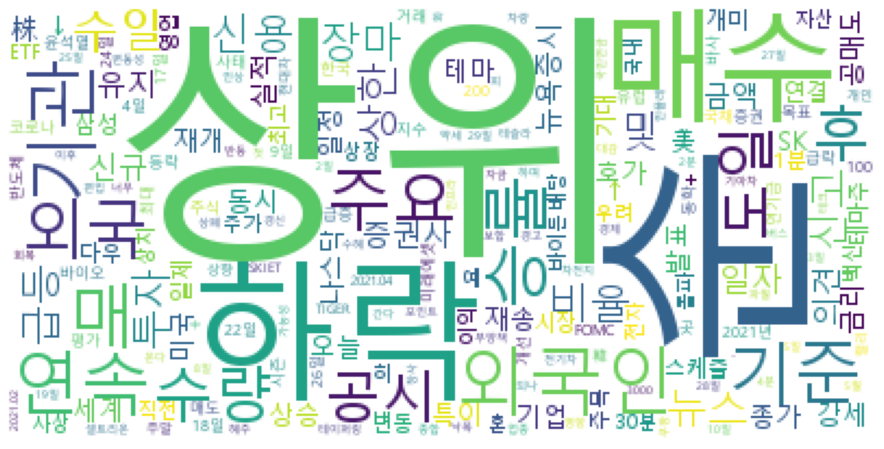

In [16]:
# 워드클라우드를 그려보자

wordcloud = WordCloud(font_path='c:/Windows/Fonts/malgun.ttf',
                     relative_scaling=0.2,
                     background_color='white').generate_from_frequencies(dict(data))

plt.figure(figsize=(16,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

# 돼지저금통 그림에 집어넣기

# 2. 감성분석 모델 만들기

In [17]:
news_df.head()

,Unnamed: 0,뉴스제목,주가변동
0,0,52주 신고가 종목,0
1,1,증시요약(9) - 기술적 분석 특징주 A(코스닥),0
2,2,증시요약(10) - 기술적 분석 특징주 B(코스닥),0
3,3,오후장 기술적 분석 특징주 A(코스닥),0
4,4,오후장 기술적 분석 특징주 B(코스닥),0


In [18]:
# 형태소 분석을 위한 함수

def tokenizer(text):
    okt = Okt()
    return okt.morphs(text)

In [19]:
def data_preprocessing():
    # 수집한 데이터 읽어오기
    # news_df = pd.read_excel()
    
    # 학습셋, 테스트셋 분리
    title_list = news_df['뉴스제목'].tolist()
    price_list = news_df['주가변동'].tolist()
    
    from sklearn.model_selection import train_test_split
    
    # 데이터의 80%는 학습셋, 20%는 테스트셋
    title_train, title_test, price_train, price_test = train_test_split(title_list, price_list, test_size=0.2, random_state=0)
    
    return title_train, title_test, price_train, price_test

In [20]:
def learning(x_train, y_train, x_test, y_test):
    # 전처리가 끝난 데이터를 단어 사전으로 만들고
    # 리뷰별로 나오는 단어를 파악해서 수치화 (벡터화)해서 학습
    # tfidf, 로지스틱 회귀 이용
    
    tfidf = TfidfVectorizer(lowercase=False, tokenizer=tokenizer)
    # 로지스틱
    logistic = LogisticRegression(C=2, penalty='l2', random_state=0)     # C의 숫자가 너무 크면 과적합 (기본 1), penalty로 과적합 방지
    
    pipe = Pipeline([('vect',tfidf),('clf',logistic)])
    
    # 학습
    pipe.fit(x_train, y_train)
    
    # 학습 정확도 측정
    y_pred = pipe.predict(x_test)
    print(accuracy_score(y_test, y_pred))
    
    # 학습한 모델을 저장
    with open('pipe.dat', 'wb') as fp:     # 쓰기, 바탕화면에 저장됨
        pickle.dump(pipe, fp)
        
    print('저장완료')     # 학습된 모델 저장 완료

In [21]:
def using():
    # 객체를 복원, 저장된 모델 불러오기
    with open('pipe.dat','rb') as fp:     # 읽기
        pipe = pickle.load(fp)
        
    while True :
        text = input('뉴스 타이틀을 입력해주세요 : ')     # 인풋
        
        str = [text]
        
        # 예측 정확도
        r1 = np.max(pipe.predict_proba(str)*100)     # 확률값을 구해서 *100..?
        
        # 예측 결과
        r2 = pipe.predict(str)[0]     # 긍정('1'), 부정('0')
        
        if r2 == '1':
            print('코스피지수는 상승할 것으로 예상됩니다.')
        else: 
            print('코스피지수는 하락할 것으로 예상됩니다.')
            
        print('정확도 : %.3f' % r1)
        print('------------------------------------------------')

In [22]:
# 학습 함수

def model_learning():   # 감성분석 모델 생성
    title_train, title_test, price_train, price_test = data_preprocessing()
    learning(title_train, price_train, title_test, price_test)
    
# 사용 함수

def model_using():   # 감성분석 모델 사용
    using()

In [23]:
model_learning()

0.5020833333333333
저장완료


In [ ]:
model_using()